In [1]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [3]:
monthfile='MERRA2_2016_tavg1_2d_aer_Nx_M2T1NXAER_ohp_11.csv'
yearfile='MERRA2_2016_tavg1_2d_aer_Nx_M2T1NXAER_ohp_AllYear.csv'

In [4]:
df_month=pd.read_csv(monthfile)

In [5]:
df_year=pd.read_csv(yearfile)

In [6]:
df_month.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,720.000000,720.000000,720.000000
mean,1.193413,0.076226,0.071053
std,0.265348,0.050457,0.048790
min,0.281200,0.022252,0.019411
25%,1.086361,0.039854,0.035610
50%,1.276567,0.061999,0.057235
75%,1.369683,0.093452,0.088118
max,1.617553,0.286591,0.272215


In [7]:
def GetMeanAndSigma(arr):
    themean=np.mean(arr)
    thevariance=np.var(arr)
    thesigma=np.sqrt(thevariance)
    newmean=np.trunc(themean*1000)/1000
    newsigma=np.trunc(thesigma*1000)/1000
    #newmean=np.round(themean,3)
    #newsigma=np.round(thesigma,3)
    #newmean=np.rint(themean*1000)/1000
    #newsigma=np.rint(thesigma*1000)/1000
    thevariation=newsigma/newmean
    thevaria=np.trunc(thevariation*100)
    return newmean,newsigma,thevaria

In [8]:
exct_aer_month=df_month["TOTEXTTAU"]

In [9]:
themean_m, thestd_m,thevariation_m= GetMeanAndSigma(exct_aer_month)

In [10]:
print themean_m, thestd_m, thevariation_m

0.076 0.05 65.0


In [11]:
title = "Monthly variation of Aerosols extinctions (nov 2016), mean = {} std = {} ({}%)".format(themean_m ,thestd_m, thevariation_m)

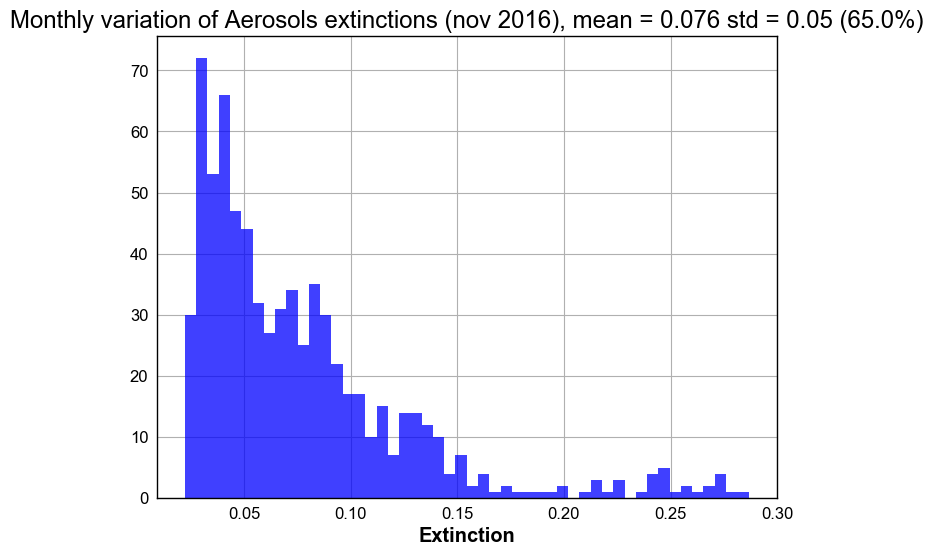

In [12]:
n, bins, patches = plt.hist(exct_aer_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Extinction')
plt.savefig('HistoAerExt2016_11.pdf')

In [13]:
ang_aer_month=df_month["TOTANGSTR"]

In [14]:
themean_m, thestd_m,thevariation_m= GetMeanAndSigma(ang_aer_month)

In [15]:
print themean_m, thestd_m, thevariation_m

1.193 0.265 22.0


In [16]:
title = "Monthly variation of Angstrom exponent Aerosols (nov 2016), mean = {} std = {} ({}%)".format(themean_m ,thestd_m, thevariation_m)

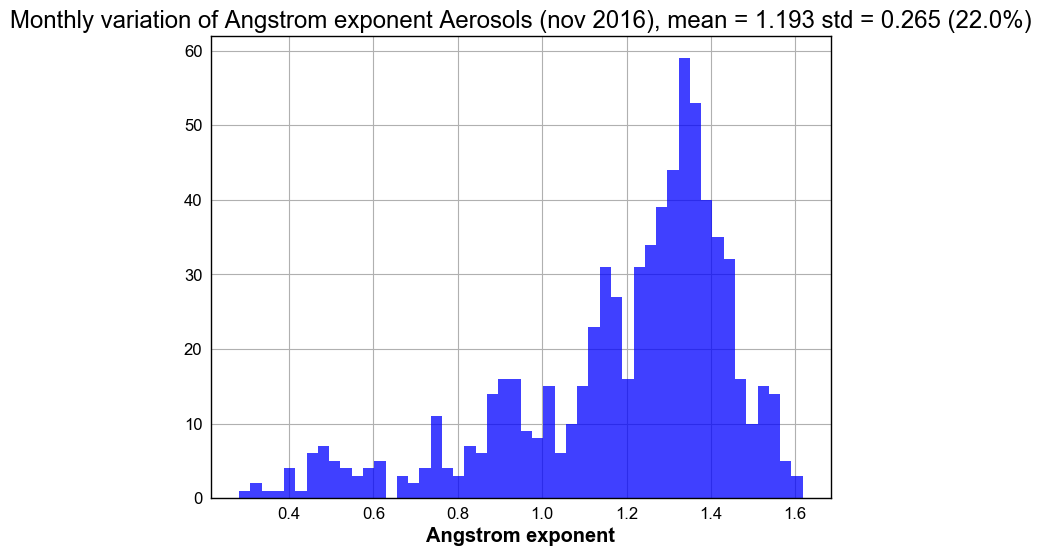

In [17]:
n, bins, patches = plt.hist(ang_aer_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Angstrom exponent')
plt.savefig('HistoAerAng2016_11.pdf')

In [18]:
df_year.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,8040.000000,8040.000000,8040.000000
mean,1.228361,0.125850,0.117271
std,0.296831,0.112493,0.106786
min,0.120611,0.019152,0.016932
25%,1.101056,0.062024,0.055662
50%,1.286306,0.090181,0.082888
75%,1.437327,0.145900,0.136879
max,1.759696,1.097359,1.023875


In [19]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0.05,0.605816,0.037843,0.033856
0.10,0.851198,0.045468,0.040491
0.50,1.286306,0.090181,0.082888
0.90,1.542915,0.243549,0.231406
0.95,1.583615,0.322024,0.305521


In [20]:
exct_aer_year=df_year["TOTEXTTAU"]

In [21]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(exct_aer_year)

In [22]:
title = "Yearly variation of Aerosols extinctions, mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

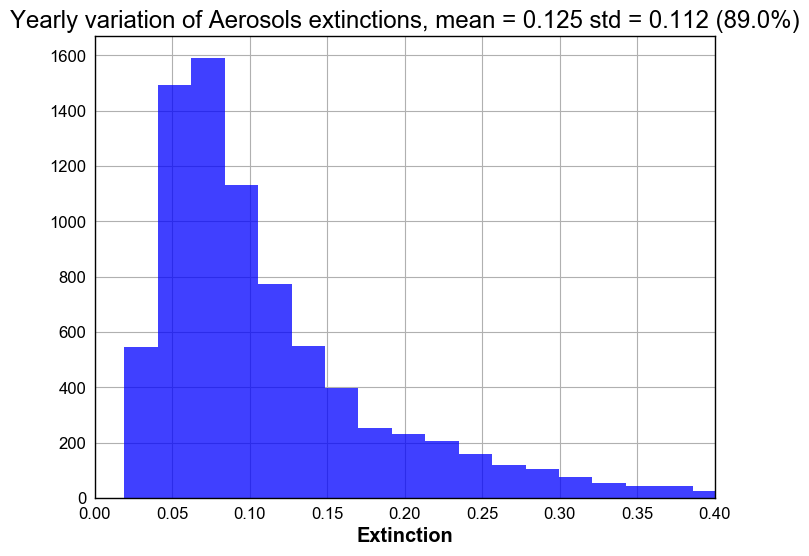

In [23]:
n, bins, patches = plt.hist(exct_aer_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlim(0.,0.4)
plt.xlabel('Extinction')
plt.savefig('HistoAerExt2016_year.pdf')

In [24]:
ang_aer_year=df_year["TOTANGSTR"]

In [25]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(ang_aer_year)

In [26]:
title = "Yearly variation of Angstrom exponent Aerosols (2016), mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

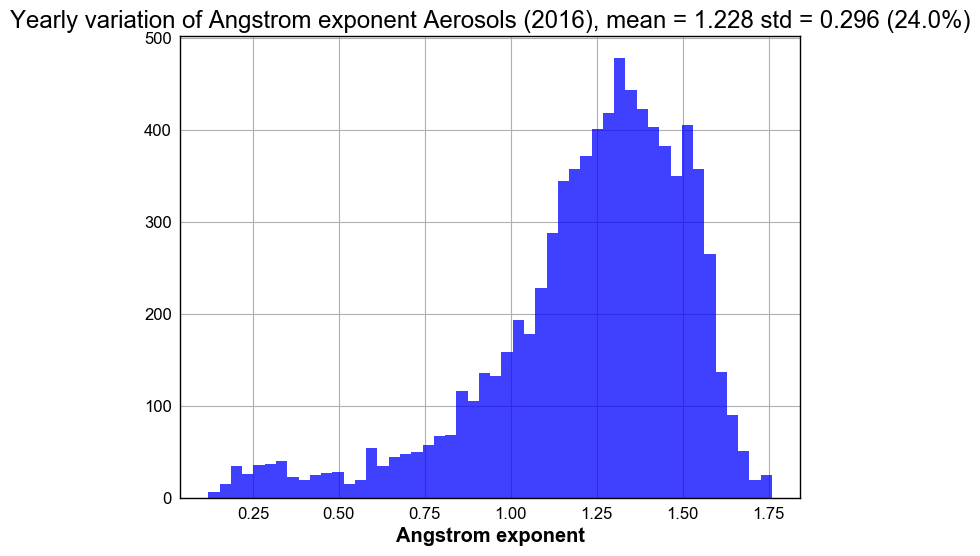

In [27]:
n, bins, patches = plt.hist(ang_aer_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Angstrom exponent')
plt.savefig('HistoAerAng2016_year.pdf')